## Task 2 : Decision Trees for Human Activity Recognition [3 marks]

1. Use Sklearn Library to train Decision Tress. **[1.5 marks]**

In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import matplotlib.pyplot as plt
import os
from Dataset.MakeDataset import X,y 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

Training data shape:  (126, 500, 3)
Testing data shape:  (54, 500, 3)
Training output data shape:  (126,)
Testing output data shape:  (54,)


In [2]:
X_tfsel = X
X = X.mean(axis=1)

* Train a decision tree model using the raw accelerometer data. Report the accuracy, precision, recall and confusion matrix of the model. 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


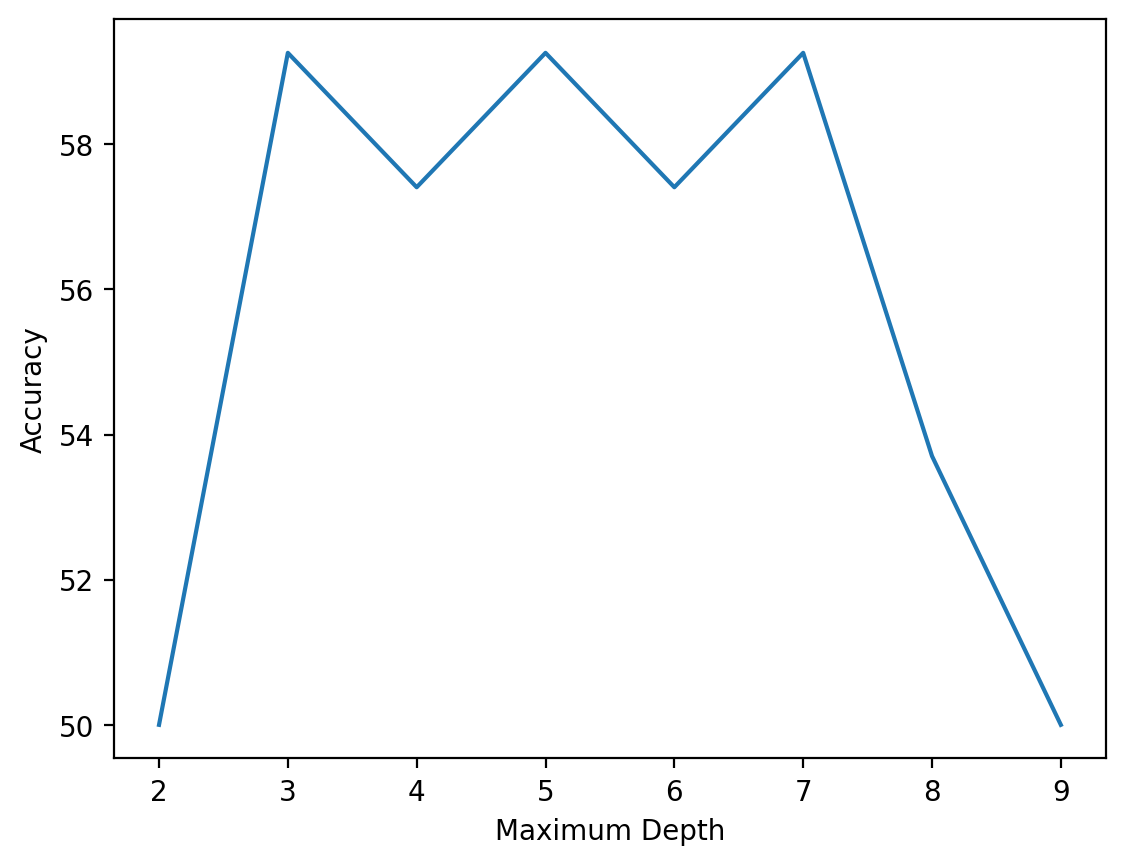

In [3]:
X_list = []
y_list = []

for i in range(2,10):
    X_list.append(i)
    dt = DecisionTreeClassifier(criterion='entropy', max_depth=i)
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=20,stratify=y)
    dt.fit(X_train, y_train)
    y_predicted = dt.predict(X_test)
    y_predicted = pd.DataFrame({'Label':y_predicted})
    accuracy = accuracy_score(y_test, y_predicted)
    y_list.append(accuracy*100)
    precision = precision_score(y_test, y_predicted, average='weighted')
    recall = recall_score(y_test, y_predicted, average='weighted')
    conf_matrix = confusion_matrix(y_test, y_predicted)


dt_raw = DecisionTreeClassifier(criterion='entropy', max_depth=7)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=20,stratify=y)
dt_raw.fit(X_train, y_train)
y_predicted = dt_raw.predict(X_test)
y_predicted = pd.DataFrame({'Label':y_predicted})
accuracy = accuracy_score(y_test, y_predicted)
precision = precision_score(y_test, y_predicted, average='weighted')
recall = recall_score(y_test, y_predicted, average='weighted')
conf_matrix = confusion_matrix(y_test, y_predicted)
plt.plot(X_list, y_list)
plt.xlabel('Maximum Depth')
plt.ylabel('Accuracy')
plt.show()


In [4]:
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.5926
Precision: 0.6121
Recall: 0.5926
Confusion Matrix:
[[5 3 1 0 0 0]
 [1 5 1 0 2 0]
 [3 1 4 0 1 0]
 [1 0 0 7 1 0]
 [3 2 2 0 2 0]
 [0 0 0 0 0 9]]


* Train a decision tree model using the features obtained by TSFEL. Report the accuracy, precision, recall and confusion matrix of the model. 

*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_2917/538494174.py:15: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel)])



*** Feature extraction finished ***


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


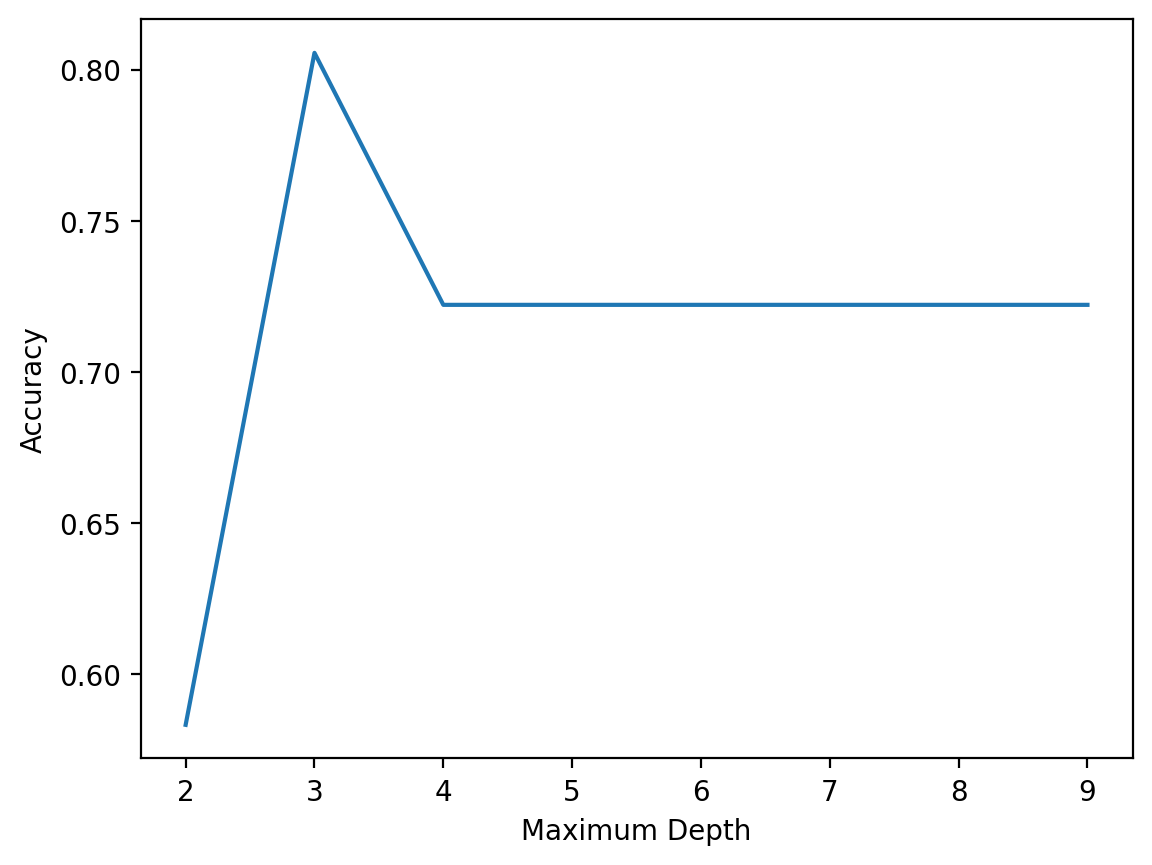

Accuracy: 0.8056
Precision: 0.8095
Recall: 0.8056
Confusion Matrix:
[[5 1 0 0 0 0]
 [1 5 1 0 0 0]
 [0 1 2 0 0 0]
 [0 0 0 5 1 0]
 [0 0 0 2 6 0]
 [0 0 0 0 0 6]]


In [5]:
import tsfel
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split


# Assuming X has shape (180, 500, 3)

# Define an empty DataFrame to store extracted features
import pandas as pd
features_df = pd.DataFrame()
cfg = tsfel.get_features_by_domain()

# Extract features for each axis (X, Y, Z) separately and concatenate
    # Extract features for each axis
tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel)])

# Append to the features DataFrame
features_df = pd.concat([features_df, tsfel_features], ignore_index=True)

# Convert features DataFrame to numpy array
X_features = features_df.to_numpy()
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_features, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier
accuracy_list = []
depth_list = []
for i in range(2,10):
    depth_list.append(i)
    dt_tsfel = DecisionTreeClassifier(random_state=42, max_depth=i)
    # Train the model
    dt_tsfel.fit(X_train, y_train)

    # Predict on the test set
    y_pred = dt_tsfel.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_list.append(accuracy)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_test, y_pred)
# depth_list.append(i)
dt_tsfel = DecisionTreeClassifier(random_state=42, max_depth=3)
# Train the model
dt_tsfel.fit(X_train, y_train)

# Predict on the test set
y_pred = dt_tsfel.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
# accuracy_list.append(accuracy)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)
plt.plot(depth_list, accuracy_list)
plt.xlabel('Maximum Depth')
plt.ylabel('Accuracy')
plt.show()
# Print the results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print("Confusion Matrix:")
print(conf_matrix)


* Train a decision tree model using the features provided in the dataset. Report the accuracy, precision, recall and confusion matrix of the model. 

In [6]:
import pandas as pd
from sklearn.metrics import accuracy_score
train_path = "./UCI HAR Dataset/train"
test_path = "./UCI HAR Dataset/test"

X_features = pd.read_csv(os.path.join(train_path,"X_train.txt"), delim_whitespace=True, header=None)
featurel = pd.read_csv(os.path.join("./UCI HAR Dataset","features.txt"), delim_whitespace=True, header=None)
featurelist = list(featurel.loc[:,1])
X_features.columns = featurelist
y_features = pd.read_csv(os.path.join(train_path,"y_train.txt"), delim_whitespace=True, header=None)
X_features_test = pd.read_csv(os.path.join(test_path,"X_test.txt"), delim_whitespace=True, header=None)
X_features_test.columns = featurelist
y_features_test = pd.read_csv(os.path.join(test_path,"y_test.txt"), delim_whitespace=True, header=None)

/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_2917/1860018030.py:6: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_features = pd.read_csv(os.path.join(train_path,"X_train.txt"), delim_whitespace=True, header=None)
/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_2917/1860018030.py:7: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  featurel = pd.read_csv(os.path.join("./UCI HAR Dataset","features.txt"), delim_whitespace=True, header=None)
/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_2917/1860018030.py:10: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  y_features = pd.read_csv(os.path.join(train_path,"y_train.txt"), delim_whitespace=True, header=None)
/var/folders/

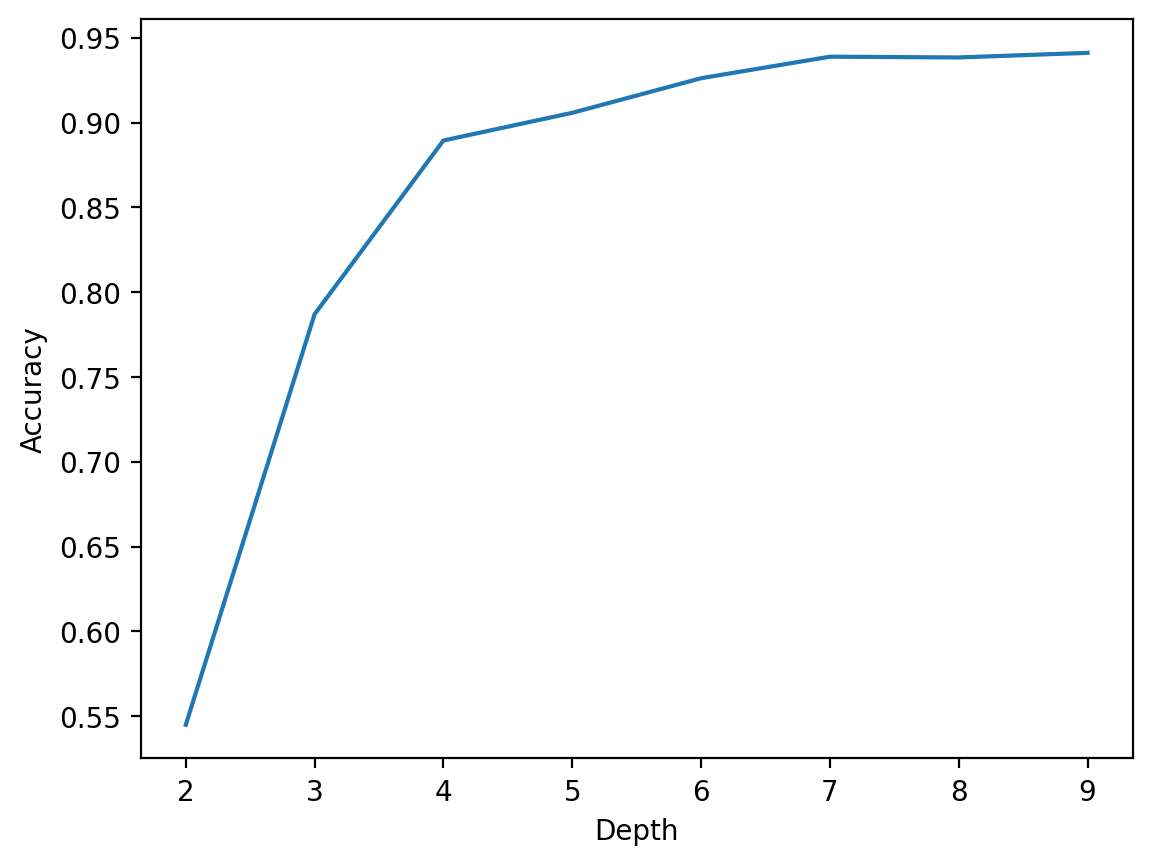

In [7]:
maxd = 0
max_accuracy = 0

depth_list = []
accuracy_list = []

for i in range(2,10):
    
    dt_features = DecisionTreeClassifier(criterion='gini', max_depth=i)
    X_train,X_test,y_train,y_test = train_test_split(X_features,y_features,test_size=0.3,random_state=20,stratify=y_features)
    dt_features.fit(X_train, y_train)
    y_predicted = dt_features.predict(X_test)
    y_predicted = pd.Series(y_predicted, index=y_test.index)

    depth_list.append(i)
    accuracy = accuracy_score(y_test, y_predicted)
    accuracy_list.append(accuracy)
        
accuracy = accuracy_score(y_test, y_predicted)
precision = precision_score(y_test, y_predicted, average='weighted')
recall = recall_score(y_test, y_predicted, average='weighted')
conf_matrix = confusion_matrix(y_test, y_predicted)

plt.plot(depth_list,accuracy_list)
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.show()

In [8]:
print(f"Accuracy: {accuracy*100:.4f}")
print(f"Precision: {precision*100:.4f}")
print(f"Recall: {recall*100:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 94.1070
Precision: 94.1261
Recall: 94.1070
Confusion Matrix:
[[355  10   3   0   0   0]
 [  9 299  14   0   0   0]
 [ 13   6 277   0   0   0]
 [  0   0   0 341  45   0]
 [  0   0   0  30 382   0]
 [  0   0   0   0   0 422]]


* Compare the results of the three models. Which model do you think is better? 

    Ans: Result of Model with features in dataset > Model obtained by TSFEL > Model using raw accelerometer data. Model with features in dataset is the best model as it incorporates 561 features among which few maybe really critical ones.

2. Train Decision Tree with varying depths (2-8) using all above 3 methods. Plot the accuracy of the model on test data vs the depth of the tree. **[1 marks]**

    Ans: Depth vs Accuracy is already plotted above parallely with each question

3. Are there any participants/ activitivies where the Model performace is bad? If Yes, Why? **[0.5 mark]**

    Ans: Yes, if you see the 1st column of confusion matrix of raw accelerometer data, it is absolutely random. It shows that current features (accx, accy, accz) are not directly enough to make decision about "Walking", but when added 561 features, it shows decent results.